In [1]:
%matplotlib inline 
import pandas as pd
from pprint import pprint
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(color_codes=True)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.width', 1000)

In [2]:
path_to_combined_pickle = 'E:\\anil\\IIT Sop\\Term02\\MATH497\\ICO_data\\original_pickle\\20170226_ICO_Data_combined.pickle'

In [3]:
combined_data_df = pd.read_pickle(path_to_combined_pickle)

In [4]:
# add count of encounters
combined_data_df['encounters_count'] = combined_data_df['encounters'].apply(len)

In [5]:
# add age calculated from DOB
def calculate_age(DOB_ordinal):
    DOB = pd.tslib.Timestamp.fromordinal(DOB_ordinal)
    return datetime.now().year - int(datetime.strftime(DOB, '%Y')) 

combined_data_df['Age'] = combined_data_df['DOB'].apply(calculate_age)

In [6]:
# normalize 'Zip' to 5 digit zip code
def normalize_zip(non_std_zip):
    if non_std_zip == 'NULL' or pd.isnull(non_std_zip):
        return float('nan')
    std_zip = non_std_zip[:5]
    return std_zip

combined_data_df['zip_code'] = combined_data_df['Zip'].apply(normalize_zip)

In [7]:
combined_data_df.to_pickle(path_to_combined_pickle)

In [8]:
combined_data_df.head()

,Age_Censored,DOB,Ethnicity,Gender,Person_ID,Race,SNOMED_problem_list,SNOMED_problem_list_count,Zip,encounters,family_hist_list,family_hist_list_count,systemic_disease_list,systemic_disease_list_count,Race_Std,encounters_count,Age,zip_code
Person_Nbr,,,,,,,,,,,,,,,,,,
109227,None,714287,Not Hispanic or Latino,F,E6121EF6-660A-4A34-B4B4-ECB513E3C916,Black/African American (Not Hispanic),"[{u'Description': u'Hypermetropia', u'Concept_...",3.0,60419,"[{u'OD_Macula2_Modifer': nan, u'OS_SL_LENS': n...","[{u'Code': u'416855002', u'Relation': u'Mother...",6.0,"[{u'Systemic_Diseases': u'Diabetes type 2', u'...",5.0,Black or African American,1,61,60419
622597,None,716389,Declined to specify,F,E50C7786-EA20-41F9-8308-C5590839B518,Declined to specify,"[{u'Description': u'Tear film insufficiency', ...",4.0,604261306,"[{u'OD_Macula2_Modifer': nan, u'OS_SL_LENS': u...","[{u'Code': u'416855002', u'Relation': u'Father...",5.0,"[{u'Systemic_Diseases': u'Diabetes', u'Snomed_...",7.0,Unknown,4,55,60426
196620,None,717417,Not Hispanic or Latino,M,8BEEFFD7-7B53-4BA1-ABC2-9B244E81ADA1,Black or African American,"[{u'Description': u'Presbyopia', u'Concept_ID'...",4.0,60609,"[{u'OD_Macula2_Modifer': nan, u'OS_SL_LENS': u...","[{u'Code': u'416855002', u'Relation': u'Father...",8.0,"[{u'Systemic_Diseases': u'Diabetes Type II', u...",8.0,Black or African American,1,52,60609
884751,None,714436,Unknown Ethnicity,M,9CD7E60C-2E0A-4E25-84C0-2440F8C83FC3,White,[{u'Description': u'Proliferative diabetic ret...,4.0,60608,"[{u'OD_Macula2_Modifer': nan, u'OS_SL_LENS': u...","[{u'Code': u'439724007', u'Relation': u'Mother...",2.0,[{u'Systemic_Diseases': u'Diabetic retinopathy...,8.0,White,1,60,60608
819216,None,727602,Hispanic or Latino,F,52C478F4-B3F2-457C-8A72-E18458BCCB96,Hispanic,[{u'Description': u'Central retinal vein occlu...,1.0,60647,"[{u'OD_Macula2_Modifer': nan, u'OS_SL_LENS': u...","[{u'Code': u'NULL', u'Relation': u'Mother', u'...",2.0,[{u'Systemic_Diseases': u'Diabetes mellitus ty...,2.0,Hispanic or Latino,1,24,60647


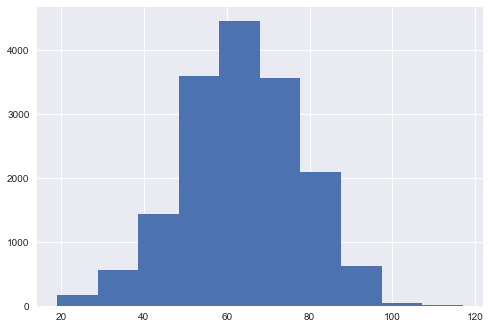

In [9]:
combined_data_df['Age'].hist()

In [10]:
combined_data_df['zip_code'].value_counts()

60619    1256
60653    1088
60617     992
60620     986
60628     985
60616     927
60637     854
60649     817
60615     653
60609     629
60636     556
60621     533
60629     446
60643     399
60608     364
60632     251
60652     203
60623     185
60827     177
60409     175
60644     159
60651     152
60624     151
60612     151
60640     139
60639     134
60419     112
60605     112
60473      97
60647      95
         ... 
97838       1
50310       1
46341       1
46347       1
60040       1
60042       1
62708       1
30324       1
62703       1
78540       1
60203       1
66160       1
64069       1
2891        1
61114       1
47804       1
46385       1
46411       1
30004       1
29209       1
61115       1
46222       1
60442       1
46361       1
46368       1
60142       1
60061       1
60064       1
60067       1
61455       1
Name: zip_code, dtype: int64